## Evaluate performance of models on prompt engineering set

* Few shot LLama 7b
* Few shot LLama 13
* Expert annotated set - "supposed ground truth


### Import packages

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Read data 

In [128]:
def load_file(file_relative_path, file_format='csv'):
    # Construct the absolute path
    absolute_path = '/data/volume_2/LLM_validate/src/analysis/performance/' + file_relative_path

    if file_format == 'csv':
        # Read the CSV file into a DataFrame
        df = pd.read_csv(absolute_path)
    elif file_format == 'excel':
        # Read the Excel file into a DataFrame
        df = pd.read_excel(absolute_path)
    else:
        raise ValueError("Unsupported file format. Supported formats are 'csv' and 'excel'.")

    return df


In [129]:
def load_excel_file(file_relative_path):
    # Construct the absolute path
    absolute_path = '/data/volume_2/LLM_validate/src/analysis/performance/' + file_relative_path

    # Read the Excel file into a DataFrame
    df = pd.read_excel(absolute_path)

    return df

In [130]:
#7b
df1 = load_file('../../../../initial_out/7B_prompt_quality.csv')

In [316]:
#13b
df2 = load_file('../../../../initial_out/13b_prompt_quality.csv')

In [306]:
# Assuming you have a DataFrame named df2
row_index_to_replace = 89
new_value = '1' 

# Check if the row index is valid
if row_index_to_replace >= 0 and row_index_to_replace < len(df2):
    # Replace the text in the specified row and 'Event_match' column
    df2.loc[row_index_to_replace, 'Event_match'] = new_value
    print(f"Replaced text in row {row_index_to_replace} with '{new_value}'.")
else:
    print(f"Row index {row_index_to_replace} is out of range.")

Replaced text in row 89 with '1'.


In [313]:
#expert annotated
df3 = load_excel_file('../../../../initial_out/prompt_validation_set_final_done_.xlsx')

### Calculate percision, F1, confusion matrix 

In [292]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix

def calculate_precision_recall_f1_accuracy(df1, df3):
    # Calculate precision, recall, F1 score, and accuracy based on the 'event-match' and 'topic_match' columns
    precision_event = precision_score(df3['event_match'], df1['Event_match'])
    recall_event = recall_score(df3['event_match'], df1['Event_match'])
    f1_event = f1_score(df3['event_match'], df1['Event_match'])
    accuracy_event = accuracy_score(df3['event_match'], df1['Event_match'])

    precision_topic = precision_score(df3['topic_match'], df1['Topic_match'])
    recall_topic = recall_score(df3['topic_match'], df1['Topic_match'])
    f1_topic = f1_score(df3['topic_match'], df1['Topic_match'])
    accuracy_topic = accuracy_score(df3['topic_match'], df1['Topic_match'])
    
    # Create confusion matrices based on the 'event_match' and 'topic_match' columns
    conf_matrix_topic = confusion_matrix(df3['topic_match'], df1['Topic_match'])
    conf_matrix_event = confusion_matrix(df3['event_match'], df1['Event_match'])

    # Return the results as a dictionary
    results = {
        "Precision (topic_match)": precision_topic,
        "Recall (topic_match)": recall_topic,
        "F1 Score (topic_match)": f1_topic,
        "Accuracy (topic_match)": accuracy_topic,
        "Precision (event_match)": precision_event,
        "Recall (event_match)": recall_event,
        "F1 Score (event_match)": f1_event,
        "Accuracy (event_match)": accuracy_event,
        "Confusion Matrix (topic_match)": conf_matrix_topic,
        "Confusion Matrix (event_match)": conf_matrix_event
    }

    return results


In [288]:
results = calculate_precision_recall_f1_accuracy(df1, df3)

In [317]:
results2 = calculate_precision_recall_f1_accuracy(df2, df3)

In [289]:
results

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.8933333333333333,
 'F1 Score (topic_match)': 0.8427672955974843,
 'Accuracy (topic_match)': 0.7474747474747475,
 'Precision (event_match)': 0.2926829268292683,
 'Recall (event_match)': 0.631578947368421,
 'F1 Score (event_match)': 0.39999999999999997,
 'Accuracy (event_match)': 0.6363636363636364,
 'Confusion Matrix (topic_match)': array([[ 7, 17],
        [ 8, 67]]),
 'Confusion Matrix (event_match)': array([[51, 29],
        [ 7, 12]])}

In [318]:
results2

{'Precision (topic_match)': 0.8260869565217391,
 'Recall (topic_match)': 0.5066666666666667,
 'F1 Score (topic_match)': 0.628099173553719,
 'Accuracy (topic_match)': 0.5454545454545454,
 'Precision (event_match)': 0.43478260869565216,
 'Recall (event_match)': 0.5263157894736842,
 'F1 Score (event_match)': 0.47619047619047616,
 'Accuracy (event_match)': 0.7777777777777778,
 'Confusion Matrix (topic_match)': array([[16,  8],
        [37, 38]]),
 'Confusion Matrix (event_match)': array([[67, 13],
        [ 9, 10]])}

#### This confusion matrix is a 2x2 matrix that summarizes the performance of a binary classification model. It consists of four values:

* Class 0 (no match)
* Class 1 (match)


* The top-left cell represents True Negatives (TN), which are the instances correctly classified as "Class 0."
* The top-right cell represents False Positives (FP), which are instances incorrectly classified as "Class 1."
* The bottom-left cell represents False Negatives (FN), which are instances incorrectly classified as "Class 0."
* The bottom-right cell represents True Positives (TP), which are instances correctly classified as "Class 1."

### Plot confusion matrix 

#### llama 7B

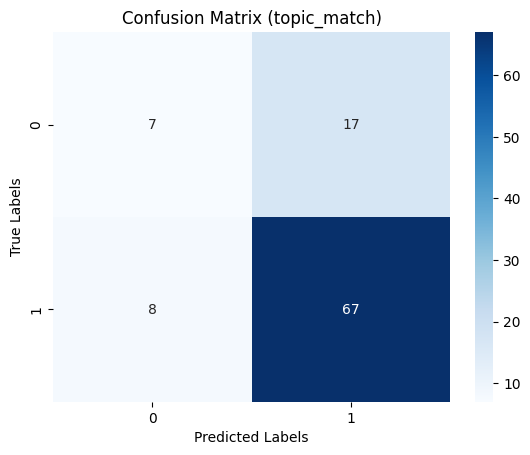

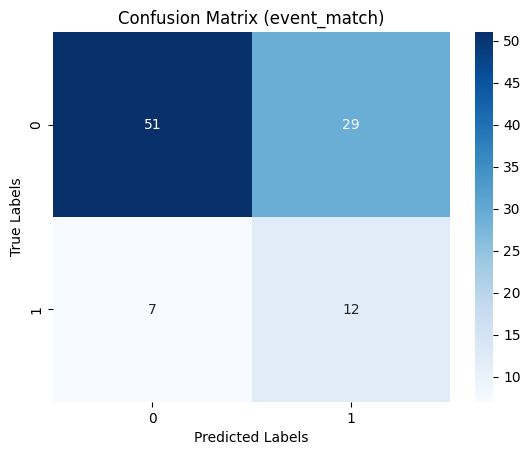

In [141]:
# Plot the confusion matrices
#llama 7b

sns.heatmap(results["Confusion Matrix (topic_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (topic_match)')
plt.show()


sns.heatmap(results["Confusion Matrix (event_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (event_match)')
plt.show()

#### llama 13B

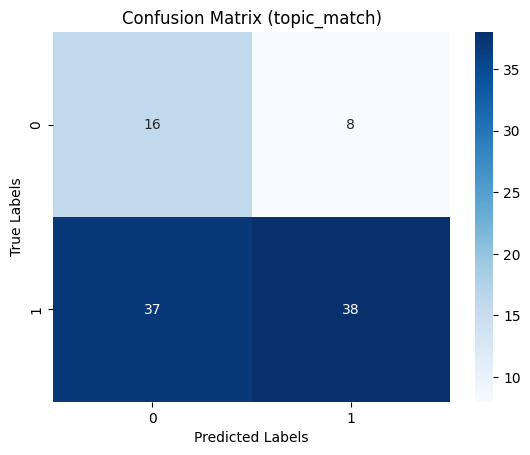

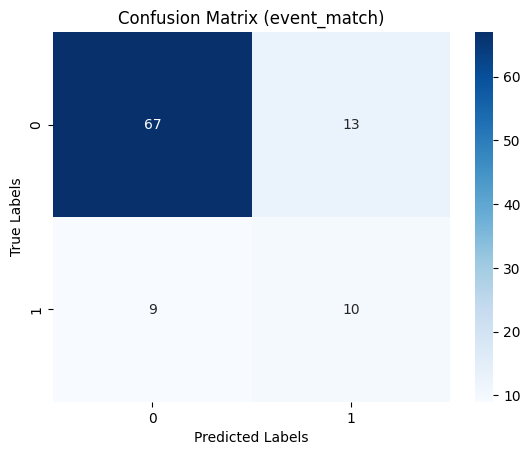

In [323]:
sns.heatmap(results2["Confusion Matrix (topic_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (topic_match)')
plt.show()


sns.heatmap(results2["Confusion Matrix (event_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (event_match)')
plt.show()

### Interpretation

So far model performance is not great. Llama 7b appears to perform better at identifying topic matches - it has higher agreement with expert annotations. But it performs very badly on news event match task.

On the other hand LLama 13b performs accetable on topic match task and mediocre on the new event level match.



### Best performance I could achieve:


13B chat : 
* 'Precision (topic_match)': 0.8260869565217391,
*  'Recall (topic_match)': 0.5066666666666667,
*  'F1 Score (topic_match)': 0.628099173553719,
*  'Accuracy (topic_match)': 0.5454545454545454,
* 'Precision (event_match)': 0.43478260869565216,
*  'Recall (event_match)': 0.5263157894736842,
*  'F1 Score (event_match)': 0.47619047619047616,
* 'Accuracy (event_match)': 0.7777777777777778,
* 'Confusion Matrix (topic_match)': array([[16,  8],
        [37, 38]]),
* 'Confusion Matrix (event_match)': array([[67, 13],
        [ 9, 10]])




## Manual Error analysis

In [319]:
import numpy as np

# Get the indices of the rows where the predicted and ground truth labels differ
indices = np.where(df2['Event_match'] != df3['event_match'])

# Print the indices
print(indices)

(array([ 1,  2,  3, 15, 18, 20, 23, 28, 29, 38, 39, 40, 41, 43, 46, 53, 57,
       61, 62, 80, 90, 98]),)


In [320]:
# Get the predicted labels for the disputed rows
predicted_labels = df2.iloc[indices]['Event_match']# Get the predicted labels for the disputed rows

In [321]:
indices

(array([ 1,  2,  3, 15, 18, 20, 23, 28, 29, 38, 39, 40, 41, 43, 46, 53, 57,
        61, 62, 80, 90, 98]),)

In [322]:
predicted_labels

1     0
2     1
3     0
15    1
18    0
20    0
23    1
28    0
29    1
38    1
39    0
40    0
41    1
43    1
46    1
53    1
57    1
61    1
62    0
80    1
90    1
98    0
Name: Event_match, dtype: int64

In [273]:
rows = df2['Event_eval'].iloc[indices]

In [272]:
rows[62] #seems like it cannot really get the subtle connection with the 

'Moet er meer in de zorg geïnvesteerd worden?; Hoekstra CDA zegt dat er meer ge nvesteerd moet worden in de behandeling van kanker, obesitas en andere ziekten waar veel mensen aan lijden. Marijnissen van de SP vindt het schaamteloos dat de lijsttrekkers van de huidige regeringspartijen zeggen dat er meer geld in de zorg moet worden ge nvesteerd. Zij stemden steeds tegen, zegt zij. GroenLinks-lijsttrekker Klaver wil niet in harde woorden over dit onderwerp debatteren. We hebben elkaar juist nodig, zegt hij. De lijsttrekkers zijn het in ieder geval eens over de invloed die artsen moeten hebben bij dit vraagstuk.'

In [268]:
rows = df2['Text2'].iloc[indices]

In [269]:
rows[72]

"De Jonge: lijsttrekkers moeten in campagne behoedzaam zijn over corona ; Minister de Jonge van Volksgezondheid vindt het logisch dat lijsttrekkers in de verkiezingscampagne spreken over wat ze graag zouden willen aan versoepelingen, maar hij vindt ook dat ze wel behoedzaam moeten zijn. Qua besmettingscijfers is de situatie nog steeds zorgelijk en er kan nu weinig, benadrukt De Jonge. Partijgenoot en CDA-lijsttrekker Hoekstra zei gisteren in het RTL-debat dat hij eerlijk moet zijn en dat het nu niet kan, maar dat hij hoopt dat de terrassen snel open kunnen. Het is logisch dat te hopen, zei De Jonge, maar zo snel als mogelijk is niet vandaag of morgen. Zo zijn er zorgen over de situatie in de kop van Noord-Holland waar erg veel pati nten zijn. In n regio code zwart ligt niet voor de hand, we moeten de pati nten goed tussen de regio's verdelen, zegt De Jonge. Maar we met moeten met zijn allen wel code zwart voorkomen."

In [270]:
rows = df2['Text1'].iloc[indices]

In [271]:
rows[72]

"Eigenaar vraagt SP-leider om met zzp'ers te kunnen blijven werken; Een eigenaar die games ontwerpt wil graag met zzp'ers blijven werken en is bang dat de SP dit soort contracten helemaal wil verbannen. Marijnissen wil dat helemaal niet, zegt ze. Haar partij komt volgens haar vooral op voor werknemers die gedwongen worden om als zzp'er te werken, zoals koeriers van eten en pakketjes."